# Template to perform a simple stereographic plot

In [5]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> Function definition START

In [15]:
def Arc_Bat(ztype='isol1000') :

        locpath='/net/krypton/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
        locfile='bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='grey', alpha=0.8)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [35]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,1,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

>> Function definition END

In [42]:
# Ref experiment data
DATA_PATH='/net/krypton/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/DIAGS/REL-VORT/2015/'
#ds_ice=xr.open_mfdataset(DATA_PATH+'CREG12.L75-REF08_y2015m08d19.5d_IceXi.nc')
#ds_oce=xr.open_mfdataset(DATA_PATH+'CREG12.L75-REF08_y2015m08d19.5d_OceXi.nc')
ds_ice=xr.open_mfdataset(DATA_PATH+'CREG12.L75-REF08_y2015m05d05.5d_IceXi.nc')
ds_oce=xr.open_mfdataset(DATA_PATH+'CREG12.L75-REF08_y2015m05d05.5d_OceXi.nc')




# Mask of the grid
grid_dir='/net/krypton/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds_mask=xr.open_dataset(grid_dir+'CREG12.L75-REF06_mask.nc')
ds_mask
DATA_PATH='/net/krypton/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds_bathy=xr.open_dataset(DATA_PATH+'bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc')
ds_bathy

<xarray.Dataset>
Dimensions:     (x: 1580, y: 1801)
Dimensions without coordinates: x, y
Data variables:
    Bathymetry  (y, x) float32 ...
    nav_lon     (y, x) float32 ...
    nav_lat     (y, x) float32 ...
Attributes:
    History:  Based on bathymetry_CREG12_V3.3_CT20180612Larger_CT20160208_vh2...

In [43]:
ds_ice

<xarray.Dataset>
Dimensions:       (time_counter: 1, unknown: 1, x: 1580, y: 1801)
Coordinates:
  * unknown       (unknown) float32 0.0
  * time_counter  (time_counter) object 2015-05-03 12:00:00
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    socurl        (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    start_date:        19790101
    output_frequency:  5d
    CONFIG:            CREG12.L75
    CASE:              REF08

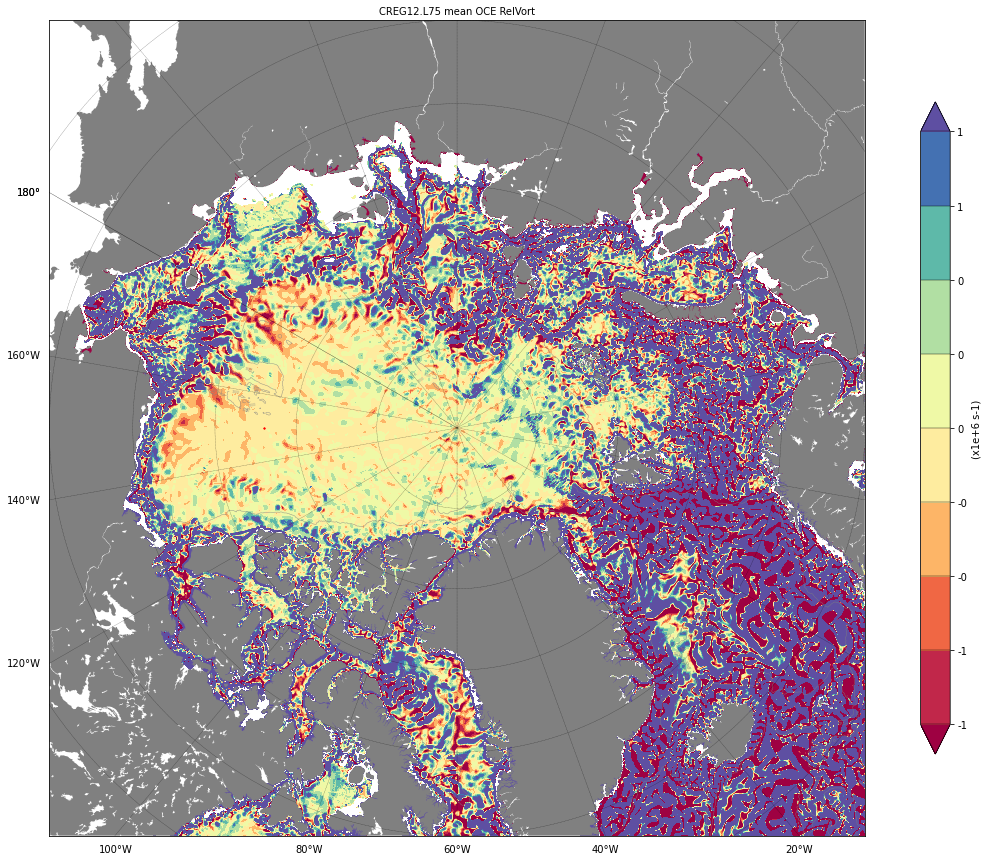

In [44]:
doplot=True
if doplot:
        plt.figure(figsize=(20,15))
        ######### SEA-ICE VOLUME #########
        my_cblab=r'(x1e+6 s-1)'
        my_cmap=plt.cm.get_cmap('Spectral')
        #my_cmap=plt.cm.get_cmap('Blues')

        zMyvar='socurl'
        m_alpha=1.e6
        zfile_ext='_RV_'
        ztitle=r'CREG12.L75 mean OCE RelVort'
        vmin=-1. ; vmax=1. ; vint=0.25
        contours=np.arange(vmin,vmax+vint,vint)  # optional contours
        limits=[vmin,vmax,vint]                        # limits for eke
        myticks=np.arange(vmin,vmax+vint,vint)   # optional colorbar ticks (None)    
        
        zoutmap=Arc_Bat(ztype='isol1000')
        Arc_plot(np.array(ds_oce['nav_lon']), np.array(ds_oce['nav_lat']), np.array(ds_oce['socurl'][0,10,:,:])*m_alpha, contours, \
                 limits, myticks, name=ztitle, zmy_cblab=my_cblab, zmy_cmap=my_cmap, zvar=zMyvar)

        
        #plt.savefig('figtest.pdf')
    
doplot=False


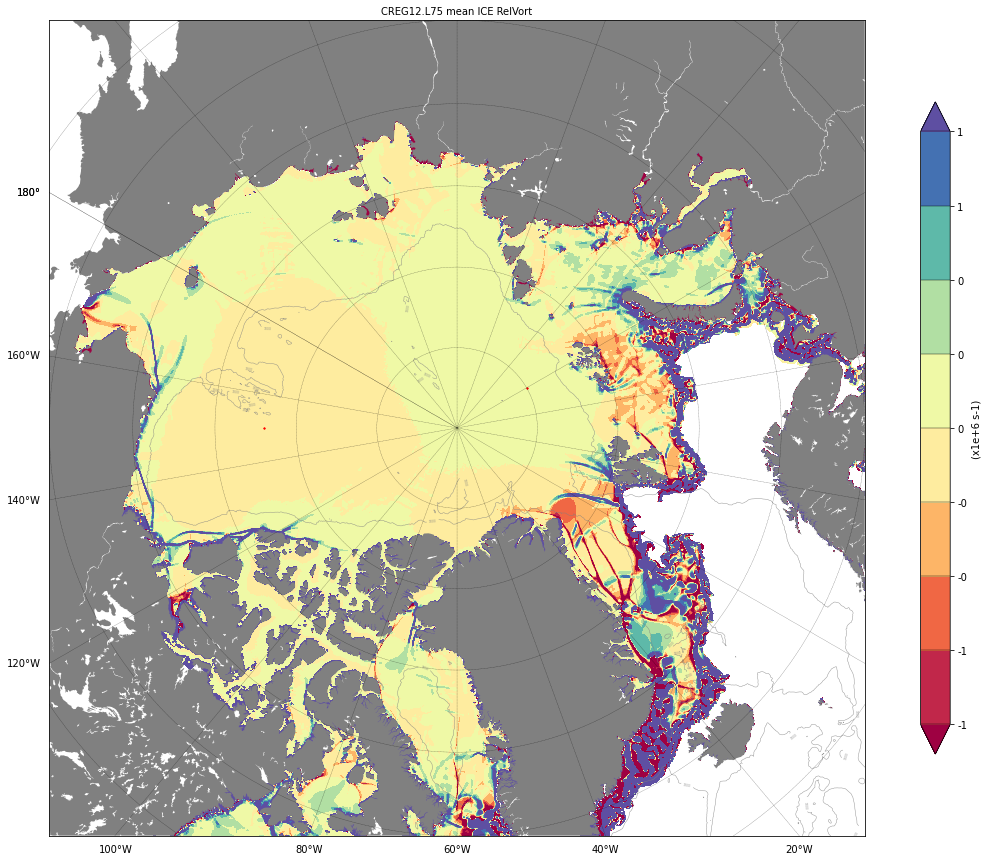

In [45]:
doplot=True
if doplot:
        plt.figure(figsize=(20,15))
        ######### SEA-ICE VOLUME #########
        my_cblab=r'(x1e+6 s-1)'
        my_cmap=plt.cm.get_cmap('Spectral')
        #my_cmap=plt.cm.get_cmap('Blues')

        zMyvar='socurl'
        m_alpha=1.e6
        zfile_ext='_RV_'
        ztitle=r'CREG12.L75 mean ICE RelVort'
        vmin=-1. ; vmax=1. ; vint=0.25
        contours=np.arange(vmin,vmax+vint,vint)  # optional contours
        limits=[vmin,vmax,vint]                        # limits for eke
        myticks=np.arange(vmin,vmax+vint,vint)   # optional colorbar ticks (None)    
        
        zoutmap=Arc_Bat(ztype='isol1000')
        Arc_plot(np.array(ds_ice['nav_lon']), np.array(ds_ice['nav_lat']), np.array(ds_ice['socurl'][0,:,:])*m_alpha, contours, \
                 limits, myticks, name=ztitle, zmy_cblab=my_cblab, zmy_cmap=my_cmap, zvar=zMyvar)

        
        #plt.savefig('figtest.pdf')
    
doplot=False



In [31]:
np.array(ds_oce['socurl'][0,0,1000,1000])*1e5

0.059139608765690355